In [1]:
#data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loading train and test data
df_train= pd.read_csv('C:/Users/Mayank/Downloads/4eddd640-9-dataset/dataset/train.csv')
df_test=pd.read_csv('C:/Users/Mayank/Downloads/4eddd640-9-dataset/dataset/test.csv')

In [13]:
#checking train data
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,item_description1,item_description2
0,1,VENDOR-61,GL-6050100,6.973473,AETNA VARIABLE FUND - Apr-2002 - Store Managem...,CLASS-784,AETNA VARIABLE FUND,Store Management Real Estate Real Estate Serv...
1,2,VENDOR-61,GL-6050100,25.053841,AETNA VARIABLE FUND - Nov-2000 - Store Managem...,CLASS-784,AETNA VARIABLE FUND,Store Management Real Estate Real Estate Serv...
2,3,VENDOR-449,GL-6050100,53.573737,FAIRCHILD CORP - Nov-2001 - Store Management R...,CLASS-784,AETNA VARIABLE FUND,Store Management Real Estate Real Estate Serv...
3,4,VENDOR-682,GL-6050100,67.388827,CALIFORNIA REAL ESTATE INVESTMENT TRUST - Aug-...,CLASS-784,AETNA VARIABLE FUND,Store Management Real Estate Real Estate Serv...
4,5,VENDOR-682,GL-6050100,74.262047,CALIFORNIA REAL ESTATE INVESTMENT TRUST - Mar-...,CLASS-784,AETNA VARIABLE FUND,Store Management Real Estate Real Estate Serv...


In [4]:
#checking test data
df_test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,6,VENDOR-1197,GL-6050100,10.916343,DESOTO INC - Jul-2008 - Store Management Real ...
1,12,VENDOR-792,GL-6050100,38.658772,CENTURY REALTY TRUST - Nov-2019 - Store Manage...
2,14,VENDOR-792,GL-6050100,46.780476,CENTURY REALTY TRUST - Jan-2006 - Store Manage...
3,18,VENDOR-792,GL-6050100,7.058866,CENTURY REALTY TRUST - Sep-2002 - Store Manage...
4,19,VENDOR-792,GL-6050100,32.931765,CENTURY REALTY TRUST - Nov-2018 - Store Manage...


We have to predict the <b> Product Category</b> 

We will look at different features. First let us look at different <b> product categories</b>

In [5]:
df_train['Product_Category'].unique()

array(['CLASS-784', 'CLASS-489', 'CLASS-913', 'CLASS-368', 'CLASS-816',
       'CLASS-629', 'CLASS-177', 'CLASS-123', 'CLASS-671', 'CLASS-804',
       'CLASS-453', 'CLASS-1042', 'CLASS-95', 'CLASS-49', 'CLASS-947',
       'CLASS-110', 'CLASS-278', 'CLASS-522', 'CLASS-606', 'CLASS-651',
       'CLASS-765', 'CLASS-953', 'CLASS-839', 'CLASS-668', 'CLASS-758',
       'CLASS-942', 'CLASS-764', 'CLASS-50', 'CLASS-51', 'CLASS-559',
       'CLASS-75', 'CLASS-74', 'CLASS-783', 'CLASS-323', 'CLASS-322',
       'CLASS-720', 'CLASS-230', 'CLASS-571'], dtype=object)

In [6]:
len(df_train['Product_Category'].unique())

38

There are 38 categories of products.<br>
Let us analyze Item_description. It looks it has more information.

In [7]:
len(df_train['Item_Description'].unique()) #Thats a lot of unique values

5118

In [8]:
df_train['Item_Description'].head() # We can break this and introduce more parameters for prediction

0    AETNA VARIABLE FUND - Apr-2002 - Store Managem...
1    AETNA VARIABLE FUND - Nov-2000 - Store Managem...
2    FAIRCHILD CORP - Nov-2001 - Store Management R...
3    CALIFORNIA REAL ESTATE INVESTMENT TRUST - Aug-...
4    CALIFORNIA REAL ESTATE INVESTMENT TRUST - Mar-...
Name: Item_Description, dtype: object

In [9]:
df_train['Item_Description'][1].split("-")

['AETNA VARIABLE FUND ',
 ' Nov',
 '2000 ',
 ' Store Management Real Estate Real Estate Services Real Estate General (Search, Appraisal, Realtor Commission)']

In [12]:
#Let us create two new columns item_description1 and item_description2 from information from item_description
df_train['item_description1']=df_train['Item_Description'][1].split("-")[0]
df_train['item_description2']=df_train['Item_Description'][1].split("-")[3]

In [14]:
#set each column
for i in range(0,len(df_train)):
    df_train['item_description1'][i] = df_train['Item_Description'][i].split("-")[0]

C:\Users\Mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
for i in range(0,len(df_train)):
    df_train['item_description2'][i] = df_train['Item_Description'][i].split("-")[3]

C:\Users\Mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_train.tail()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,item_description1,item_description2
5714,8007,VENDOR-401,GL-6121905,89.409831,BAGDAD CHASE INC - Jul-2001 - Printed Collater...,CLASS-571,BAGDAD CHASE INC,Printed Collateral Miscellaneous Printed Mate...
5715,8008,VENDOR-401,GL-6121905,35.066517,BAGDAD CHASE INC - May-2003 - Printed Collater...,CLASS-571,BAGDAD CHASE INC,Printed Collateral Miscellaneous Printed Mate...
5716,8009,VENDOR-1550,GL-6121905,51.270765,FIFTH AVENUE SECURITIES CORP - Mar-2019 - Prin...,CLASS-571,FIFTH AVENUE SECURITIES CORP,Printed Collateral Miscellaneous Printed Mate...
5717,8011,VENDOR-698,GL-6121905,42.693898,CANADA DRY BOTTLING CO OF FLORIDA INC - Mar-20...,CLASS-571,CANADA DRY BOTTLING CO OF FLORIDA INC,Printed Collateral Miscellaneous Printed Mate...
5718,8012,VENDOR-698,GL-6121905,99.841762,CANADA DRY BOTTLING CO OF FLORIDA INC - Jun-20...,CLASS-571,CANADA DRY BOTTLING CO OF FLORIDA INC,Printed Collateral Miscellaneous Printed Mate...


In [18]:
#unique values item description1 and description2
des1_unique=df_train['item_description1'].unique()
des2_unique=df_train['item_description2'].unique()

In [29]:
len_des1=len(des1_unique)
len_des2=len(des2_unique)

In [19]:
gl_code_unique=df_train['GL_Code'].unique()

In [20]:
vendor_unique=df_train['Vendor_Code'].unique()

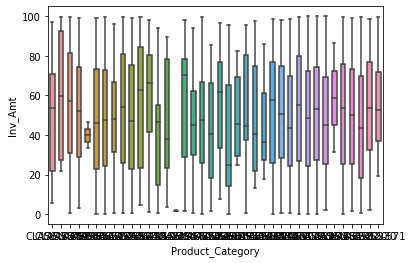

In [21]:
sns.boxplot(x='Product_Category', y='Inv_Amt', data=df_train,width=0.5)

We need to convert categorical values to float values to make data ready for prediction

In [22]:
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[0],0)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[1],1)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[2],2)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[3],3)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[4],4)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[5],5)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[6],6)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[7],7)
df_train['GL_Code']=df_train['GL_Code'].replace(gl_code_unique[8],8)


In [24]:
for i in range(len(vendor_unique)):
    df_train['Vendor_Code']=df_train['Vendor_Code'].replace(vendor_unique[i],i)
for j in range(len(des2_unique)):
    df_train['item_description2']=df_train['item_description2'].replace(des2_unique[j],j)
for k in range(len(des1_unique)):
    df_train['item_description1']=df_train['item_description1'].replace(des1_unique[k],k)

In [26]:
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,item_description1,item_description2
0,1,0,0,6.973473,AETNA VARIABLE FUND - Apr-2002 - Store Managem...,CLASS-784,0,0
1,2,0,0,25.053841,AETNA VARIABLE FUND - Nov-2000 - Store Managem...,CLASS-784,0,0
2,3,1,0,53.573737,FAIRCHILD CORP - Nov-2001 - Store Management R...,CLASS-784,1,0
3,4,2,0,67.388827,CALIFORNIA REAL ESTATE INVESTMENT TRUST - Aug-...,CLASS-784,2,0
4,5,2,0,74.262047,CALIFORNIA REAL ESTATE INVESTMENT TRUST - Mar-...,CLASS-784,2,0


In [27]:
#Making test data ready
#Let us create two new columns item_description1 and item_description2 from information from item_description
df_test['item_description1']=df_test['Item_Description'][1].split("-")[0]
df_test['item_description2']=df_test['Item_Description'][1].split("-")[3]

In [28]:
df_test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,item_description1,item_description2
0,6,VENDOR-1197,GL-6050100,10.916343,DESOTO INC - Jul-2008 - Store Management Real ...,CENTURY REALTY TRUST,Store Management Real Estate Real Estate Serv...
1,12,VENDOR-792,GL-6050100,38.658772,CENTURY REALTY TRUST - Nov-2019 - Store Manage...,CENTURY REALTY TRUST,Store Management Real Estate Real Estate Serv...
2,14,VENDOR-792,GL-6050100,46.780476,CENTURY REALTY TRUST - Jan-2006 - Store Manage...,CENTURY REALTY TRUST,Store Management Real Estate Real Estate Serv...
3,18,VENDOR-792,GL-6050100,7.058866,CENTURY REALTY TRUST - Sep-2002 - Store Manage...,CENTURY REALTY TRUST,Store Management Real Estate Real Estate Serv...
4,19,VENDOR-792,GL-6050100,32.931765,CENTURY REALTY TRUST - Nov-2018 - Store Manage...,CENTURY REALTY TRUST,Store Management Real Estate Real Estate Serv...


In [37]:
gl_code_unique_test=df_test['GL_Code'].unique()
vendor_unique_test=df_test['Vendor_Code'].unique()

In [29]:
#set each column
for i in range(0,len(df_test)):
    df_test['item_description1'][i] = df_test['Item_Description'][i].split("-")[0]

C:\Users\Mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
for i in range(0,len(df_test)):
    df_test['item_description2'][i] = df_test['Item_Description'][i].split("-")[3]

C:\Users\Mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,item_description1,item_description2
0,1,0,0,6.973473,AETNA VARIABLE FUND - Apr-2002 - Store Managem...,CLASS-784,0,0
1,2,0,0,25.053841,AETNA VARIABLE FUND - Nov-2000 - Store Managem...,CLASS-784,0,0
2,3,1,0,53.573737,FAIRCHILD CORP - Nov-2001 - Store Management R...,CLASS-784,1,0
3,4,2,0,67.388827,CALIFORNIA REAL ESTATE INVESTMENT TRUST - Aug-...,CLASS-784,2,0
4,5,2,0,74.262047,CALIFORNIA REAL ESTATE INVESTMENT TRUST - Mar-...,CLASS-784,2,0


In [36]:
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[0],0)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[1],1)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[2],2)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[3],3)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[4],4)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[5],5)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[6],6)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[7],7)
df_test['GL_Code']=df_test['GL_Code'].replace(gl_code_unique_test[8],8)

In [38]:
des1_unique_test=df_test['item_description1'].unique()
des2_unique_test=df_test['item_description2'].unique()

In [39]:
for i in range(len(vendor_unique_test)):
    df_test['Vendor_Code']=df_test['Vendor_Code'].replace(vendor_unique_test[i],i)
for j in range(len(des2_unique_test)):
    df_test['item_description2']=df_test['item_description2'].replace(des2_unique_test[j],j)
for k in range(len(des1_unique_test)):
    df_test['item_description1']=df_test['item_description1'].replace(des1_unique_test[k],k)

In [40]:
df_test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,item_description1,item_description2
0,6,0,0,10.916343,DESOTO INC - Jul-2008 - Store Management Real ...,0,0
1,12,1,0,38.658772,CENTURY REALTY TRUST - Nov-2019 - Store Manage...,1,0
2,14,1,0,46.780476,CENTURY REALTY TRUST - Jan-2006 - Store Manage...,1,0
3,18,1,0,7.058866,CENTURY REALTY TRUST - Sep-2002 - Store Manage...,1,0
4,19,1,0,32.931765,CENTURY REALTY TRUST - Nov-2018 - Store Manage...,1,0


In [41]:
X=df_train.drop(["Inv_Amt","Inv_Id","Item_Description"],axis=1)

In [42]:
X.head()

,Vendor_Code,GL_Code,Product_Category,item_description1,item_description2
0,0,0,CLASS-784,0,0
1,0,0,CLASS-784,0,0
2,1,0,CLASS-784,1,0
3,2,0,CLASS-784,2,0
4,2,0,CLASS-784,2,0


In [43]:
X_train = X.drop("Product_Category", axis=1)
Y_train = X["Product_Category"]
X_test  = df_test.drop(["Inv_Amt","Inv_Id","Item_Description"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((5719, 4), (5719,), (2292, 4))

In [49]:
# support vector machine
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99.79

In [50]:
Y_pred

array(['CLASS-784', 'CLASS-784', 'CLASS-784', ..., 'CLASS-75', 'CLASS-75',
       'CLASS-75'], dtype=object)

In [51]:
submission = pd.DataFrame({
        "Inv_Id": df_test["Inv_Id"],
        "Product_Category": Y_pred
    })
submission.to_csv('submission_hack.csv', encoding='utf-8', index=False)